# Subset Generation from a Parent Dataset

In [31]:
import mirdata
import os
import re
import shutil
import numpy as np
import matplotlib.pyplot as plt
import torch
from scipy import signal

In [32]:
# @title Helper functions for plotting

def plot_waveform(waveform: np.ndarray, sr: int, title="Waveform", ax=None):
    if waveform.ndim == 2:
        num_channels, num_frames = waveform.shape
    else:
        num_channels, num_frames = 1, waveform.shape[0]

    time_axis = torch.arange(0, num_frames) / sr

    if ax is None:
        _, ax = plt.subplots()

    if num_channels == 1:
        ax.plot(time_axis, waveform, linewidth=1)
    else:
        ax.plot(
            time_axis, waveform[0], linewidth=1
        )  # Assuming you want to plot the first channel

    ax.grid(True)
    ax.set_xlabel("Time [s]")
    ax.set_ylabel("Amplitude")
    ax.set_xlim([0, time_axis[-1]])
    ax.set_title(title)


def plot_spectrogram(
    waveform: np.ndarray, sr: int = None, title="Spectrogram", ax=None
):
    if waveform.ndim == 2:
        waveform = waveform[0]  # If stereo, take only the first channel

    # Compute the STFT
    f, t, Zxx = signal.stft(waveform, fs=sr)

    # Convert to magnitude (spectrogram)
    specgram = np.abs(Zxx)

    # Plotting
    if ax is None:
        _, ax = plt.subplots(1, 1)

    # Plot the spectrogram
    ax.imshow(
        20 * np.log10(specgram + 1e-10),
        origin="lower",
        aspect="auto",
        extent=[t[0], t[-1], f[0], f[-1]],
        cmap="inferno",
    )
    ax.set_xlabel("Time [s]")
    ax.set_ylabel("Frequency [Hz]")
    ax.set_title(title)

    if sr is not None:
        ax.set_ylim(0, sr / 2)  # Limit frequency axis to Nyquist frequency

In [29]:
idmt_smt_audio_effects = mirdata.initialize("idmt_smt_audio_effects", data_home="/Users/francescopapaleo/mir_datasets/idmt_smt_audio_effects")

## Encoding scheme for audio file names
```
B11-28100-3311-00625
ABC-DDEFF-GHHI-KKKKK
--> A-C: Bass, Yamaha, 1st setting, finger plucking normal/soft
    D-F: MIDI no. 28, E string, 0th fret (open string) --> low E
    G-I: Modulation effect, Chorus, 1st setting
    K  : Identification number
```

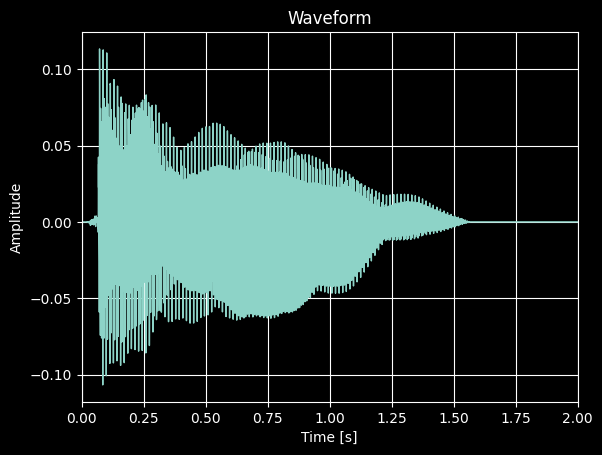

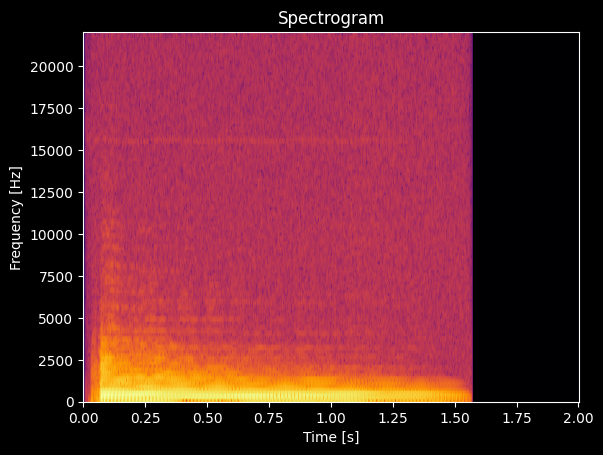

In [33]:
track = idmt_smt_audio_effects.choice_track()
x, sr = track.audio

plot_waveform(x, sr)
plot_spectrogram(x, sr)

In [47]:
def copy_files_matching_pattern(folder_path, input_dest_path, pattern):
    selected_samples_count = 0

    # Iterate over the files in the folder
    for filename in os.listdir(folder_path):
        file_path = os.path.join(folder_path, filename)

        # Check if the filename matches the pattern
        if re.match(pattern, filename):
            print(f"Copying: {filename}")
            shutil.copy(file_path, input_dest_path)
            selected_samples_count += 1
        else:
            print(f"Skipping: {filename}")
            continue

    return selected_samples_count

In [48]:
# NoFX path
nofx_folder_path = os.path.join(idmt_smt_audio_effects.data_home, "Gitarre monophon/Samples/NoFX")
input_dest_path = "/Users/francescopapaleo/mir_datasets/customset/input/"

pattern = re.compile(r'G6\d{1}-\d{5}-1111-\d{5}')

selected_samples_count = copy_files_matching_pattern(nofx_folder_path, input_dest_path, pattern)

print(f"Selected {selected_samples_count} samples")

Skipping: G71-57307-1111-20782.wav
Skipping: G93-75611-1111-21215.wav
Skipping: G91-67508-1111-21121.wav
Copying: G63-58308-1111-20705.wav
Skipping: G93-48203-1111-21155.wav
Skipping: G81-60501-1111-20958.wav
Copying: G61-64600-1111-20658.wav
Skipping: G83-69605-1111-21053.wav
Skipping: G73-56211-1111-20851.wav
Skipping: G83-72608-1111-21056.wav
Copying: G63-69510-1111-20733.wav
Skipping: G83-46106-1111-20989.wav
Copying: G61-46106-1111-20599.wav
Copying: G61-55400-1111-20632.wav
Skipping: G81-53208-1111-20926.wav
Skipping: G91-46106-1111-21067.wav
Skipping: G81-60310-1111-20941.wav
Copying: G63-57402-1111-20712.wav
Skipping: G91-59309-1111-21096.wav
Skipping: G73-46106-1111-20833.wav
Skipping: G81-58403-1111-20947.wav
Skipping: G81-62503-1111-20960.wav
Copying: G61-66602-1111-20660.wav
Skipping: G71-51206-1111-20768.wav
Skipping: G81-70606-1111-20976.wav
Skipping: G93-50110-1111-21149.wav
Copying: G61-50205-1111-20611.wav
Skipping: G93-50205-1111-21157.wav
Copying: G63-59309-1111-2070

In [50]:
# Processed files path
fx_folder_path = os.path.join(idmt_smt_audio_effects.data_home, "Gitarre monophon/Samples/Chorus")
target_dest_folder = "/Users/francescopapaleo/mir_datasets/customset/target/"

chorus_pattern = re.compile(r'G6\d{1}-\d{5}-3311-\d{5}')

# Get the list of selected files
selected_samples_count = copy_files_matching_pattern(fx_folder_path, target_dest_folder, chorus_pattern)

print(f"Total selected samples with chorus effect: {selected_samples_count}")

Skipping: G91-61311-3311-28586.wav
Skipping: G83-47202-3312-29110.wav
Skipping: G91-69510-3312-29235.wav
Copying: G63-57402-3311-28200.wav
Skipping: G61-55305-3313-29360.wav
Skipping: G73-55305-3312-28970.wav
Skipping: G63-51111-3312-28794.wav
Copying: G63-69510-3311-28221.wav
Skipping: G91-57402-3312-29214.wav
Skipping: G93-57402-3312-29292.wav
Skipping: G81-45200-3312-29030.wav
Skipping: G71-61311-3313-29522.wav
Skipping: G63-61406-3312-28828.wav
Skipping: G83-48108-3312-29103.wav
Skipping: G83-69605-3312-29165.wav
Skipping: G81-56306-3313-29673.wav
Skipping: G73-51111-3311-28326.wav
Skipping: G61-70606-3312-28776.wav
Skipping: G83-49204-3313-29736.wav
Skipping: G61-62503-3312-28760.wav
Copying: G63-55400-3311-28198.wav
Skipping: G71-41101-3313-29486.wav
Skipping: G61-58403-3312-28747.wav
Skipping: G63-52207-3313-29427.wav
Skipping: G93-43103-3313-29878.wav
Skipping: G71-45200-3312-28874.wav
Skipping: G93-56401-3313-29915.wav
Skipping: G71-58403-3313-29527.wav
Skipping: G91-56401-331